# Paso 1. Abre el archivo de datos y estudia la información general 

In [1]:
## Hacemos las importaciones generales
import pandas as pd

df = pd.read_csv('games.csv')
df.head()

# Vemos la información general relevante del dataset
df.info()

# Estadísticas descriptivas
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


# Paso 2. Prepara los datos
## Reemplaza los nombres de las columnas (ponlos en minúsculas)
## Convierte los datos en los tipos necesarios.
## Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
## Si es necesario, elige la manera de tratar los valores ausentes:
### - Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
### - ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
### - Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
## Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [2]:
# Reemplaza los nombres de las columnas (ponlos en minúsculas)
df.columns = df.columns.str.lower()

#######################################################

# Convierte los datos en los tipos necesarios.
# Convertimos year_of_release a entero (Ya que algunos valores están en decimales
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)

# Convertimos user_score a numérico (manejando 'tbd' como NaN)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Convertimos critic_score a entero (puntajes suelen ser enteros). 
# Además los decimales no parecen ser relevantes en la columna.
df['critic_score'] = df['critic_score'].astype('Int64')



### Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
> La columna "year_of_release" debe ser entera, no decimal. 

> La columna "user_score" tiene valores 'tbd', es mejor pasarlos a NaN ya que son valores numéricos y podría generar problemas

> La columna "critic_score" la pasamos a Int64 ya que este tipo soporta NaN

In [3]:
# Si es necesario, elige la manera de tratar los valores ausentes:

# Vemos cuántos valores faltantes hay
print(df.isna().sum())
####################################################################### 

# Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

# year_of_release: Podemos dejarlos como 0 o investigar para llenarlos
# critic_score y user_score: Podemos dejarlos como NaN ya que no tenemos forma confiable de estimarlos
# rating: Podemos crear una categoría "Unknown" o dejarlos como NaN. Prefiero trabajarlos como Unknown
df['rating'] = df['rating'].fillna('Unknown')

# Para la columna user_score, los valores 'tbd' ya fueron convertidos a NaN

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


## ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

> Los puntajes (critic_score, user_score) pueden faltar porque el juego no fue evaluado.

> Los ratings pueden faltar porque no fueron clasificados

> Los años pueden faltar por falta de información histórica

> Decidí dejar los puntajes como 'NaN' porque no tenemos forma confiable de estimarlos

> Para rating agregué "Unknown" para mantener la información categorizable

In [4]:
# Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y 
# coloca estos valores en una columna separada.

# Calcular ventas totales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Podemos verificar las ventas
df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head()

display(df.isna().sum())
display(df.head())

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
total_sales           0
dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,Unknown,31.38


# Paso 3. Analiza los datos

## Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
## Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
## Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
## Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
## ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
## Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
## Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
## Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
## Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

C:\Users\alang\AppData\Local\Temp\ipykernel_33920\3285995954.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


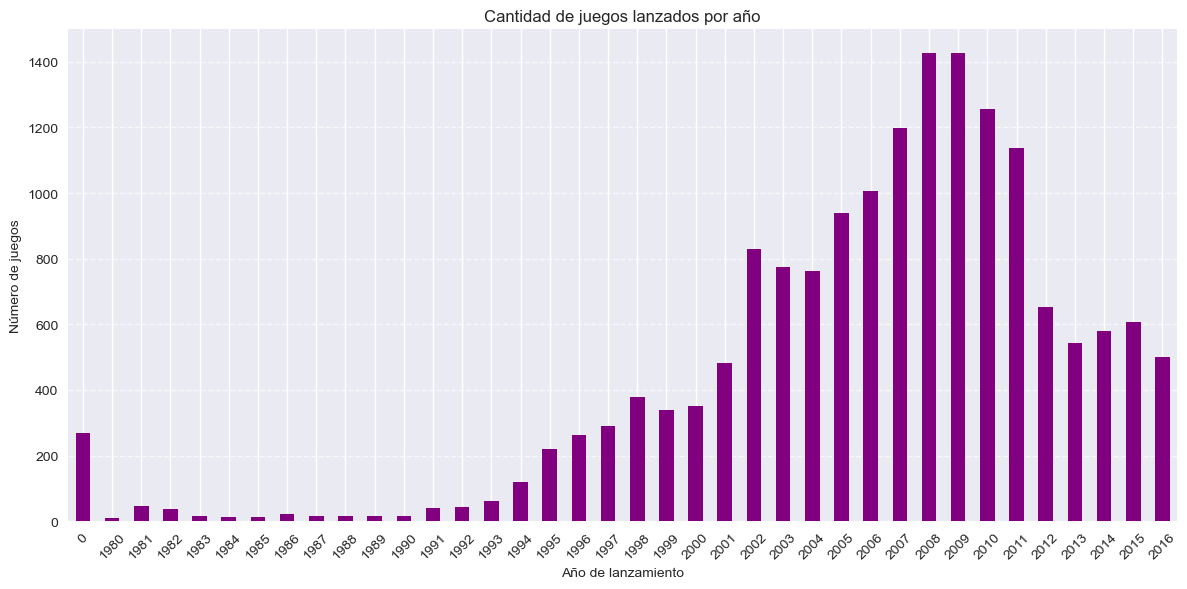

Estadísticas descriptivas de lanzamientos por año:
count      38.000000
mean      439.868421
std       446.322037
min         9.000000
25%        37.250000
50%       313.500000
75%       734.750000
max      1427.000000
Name: year_of_release, dtype: float64

Mediana de juegos por año: 313.5


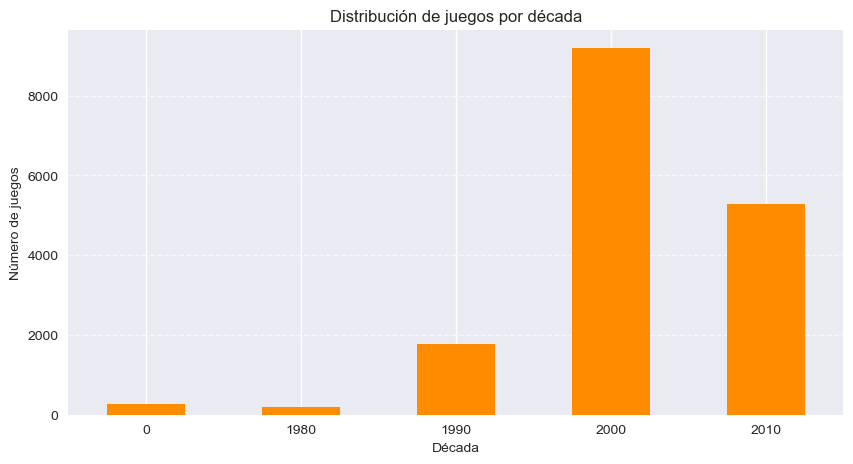

In [5]:
# Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos un poco lo visual de los gráficos
plt.style.use('seaborn')
plt.figure(figsize=(12, 6))

# Contamos los juegos por año
games_per_year = df['year_of_release'].value_counts().sort_index()

# Creamos el gráfico de barras
games_per_year.plot(kind='bar', color='purple')
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Vemos la estadística descriptiva
print("Estadísticas descriptivas de lanzamientos por año:")
print(games_per_year.describe())

# Identificamos los períodos clave
# Calculamos la media para dividir en períodos de alta/baja producción
median_games = games_per_year.median()
print(f"\nMediana de juegos por año: {median_games}")

# Para verlo más gráficamente, plasmamos el gráfico en décadas
df['decade'] = (df['year_of_release'] // 10) * 10
games_per_decade = df['decade'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
games_per_decade.plot(kind='bar', color='darkorange')
plt.title('Distribución de juegos por década')
plt.xlabel('Década')
plt.ylabel('Número de juegos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

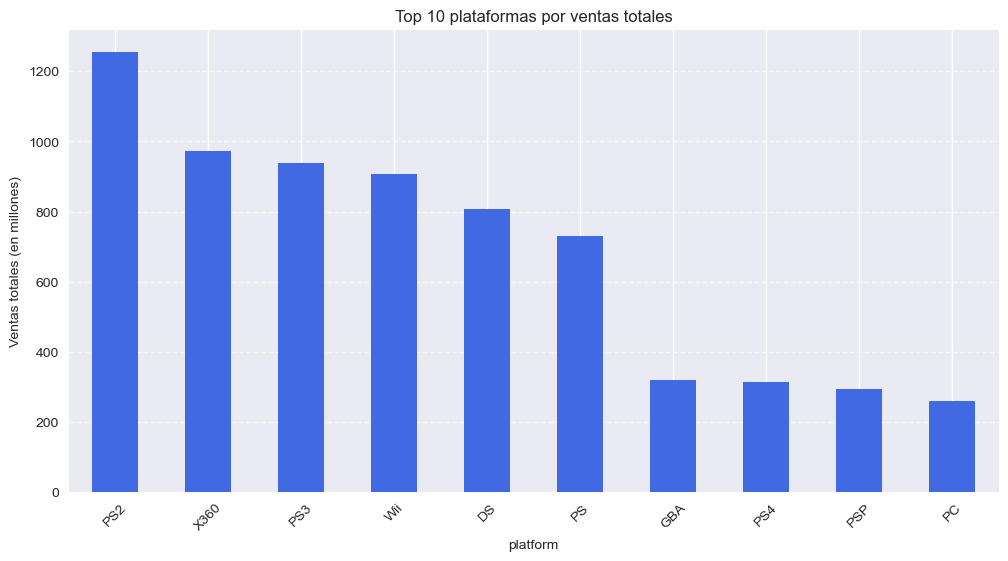

Plataformas con mayores ventas totales: ['PS2', 'X360', 'PS3', 'Wii', 'DS']


In [6]:
# Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las 
# mayores ventas totales y construye una distribución basada en los datos de cada año.
# Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 
# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

# Calculamos las ventas totales por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Graficamos las 10 principales plataformas
plt.figure(figsize=(12, 6))
platform_sales.head(10).plot(kind='bar', color='royalblue')
plt.title('Top 10 plataformas por ventas totales')
plt.ylabel('Ventas totales (en millones)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Seleccionamos las plataformas más relevantes
top_platforms = platform_sales.head(5).index.tolist()
print(f"Plataformas con mayores ventas totales: {top_platforms}")

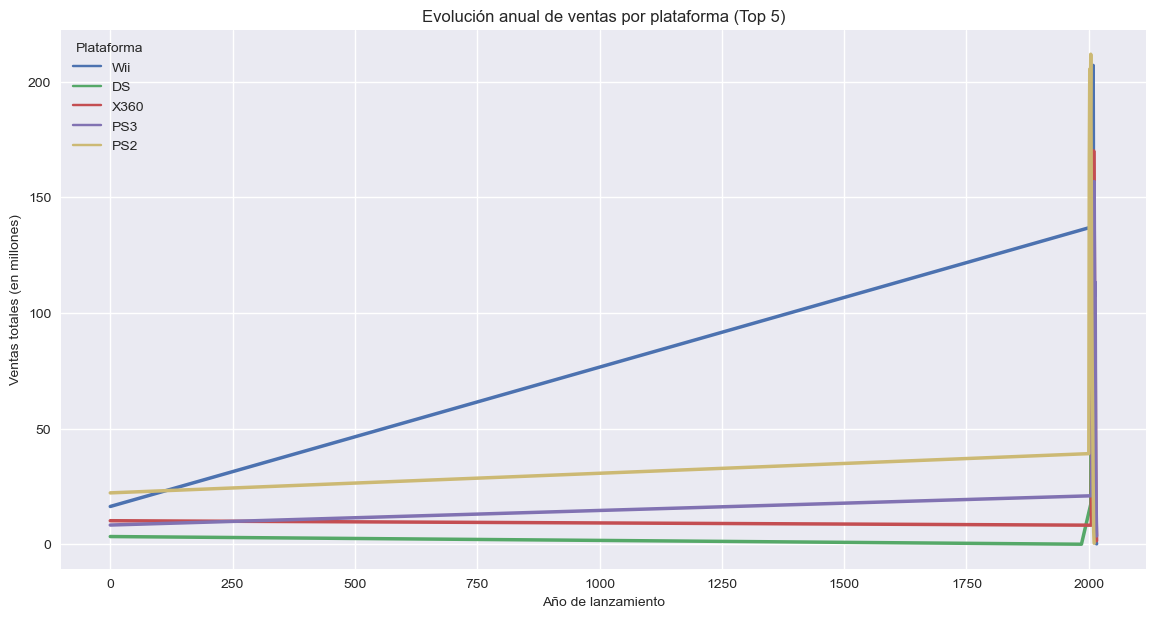

In [7]:
# Filtramos solo las plataformas principales para mejor visualización
top_df = df[df['platform'].isin(top_platforms)]

# Creamos el gráfico de líneas de evolución anual
plt.figure(figsize=(14, 7))
sns.lineplot(data=top_df, x='year_of_release', y='total_sales', hue='platform', estimator='sum', errorbar=None, linewidth=2.5)
plt.title('Evolución anual de ventas por plataforma (Top 5)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (en millones)')
plt.grid(True)
plt.legend(title='Plataforma')
plt.show()

In [8]:
# Obtenemos el último año con ventas por plataforma
last_year_active = df.groupby('platform')['year_of_release'].max()

# Obtenemos plataformas sin ventas recientes (considerando últimos 5 años)
last_year_in_data = df['year_of_release'].max()
cutoff_year = last_year_in_data - 5

dead_platforms = last_year_active[last_year_active < cutoff_year].index.tolist()

# Obtenemos las ventas de estas plataformas cuando eran populares
dead_platforms_sales = df[df['platform'].isin(dead_platforms)].groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("\nPlataformas que fueron populares pero ya no tienen ventas recientes:")
print(dead_platforms_sales.head(10))


Plataformas que fueron populares pero ya no tienen ventas recientes:
platform
PS      730.86
GBA     317.85
XB      257.74
GB      255.46
NES     251.05
N64     218.68
SNES    200.04
GC      198.93
2600     96.98
SAT      33.59
Name: total_sales, dtype: float64



Estadísticas del ciclo de vida de las plataformas (en años):
count      31.000000
mean     1038.967742
std      1018.948264
min         0.000000
25%         3.000000
50%      1989.000000
75%      2012.000000
max      2016.000000
Name: duration, dtype: float64


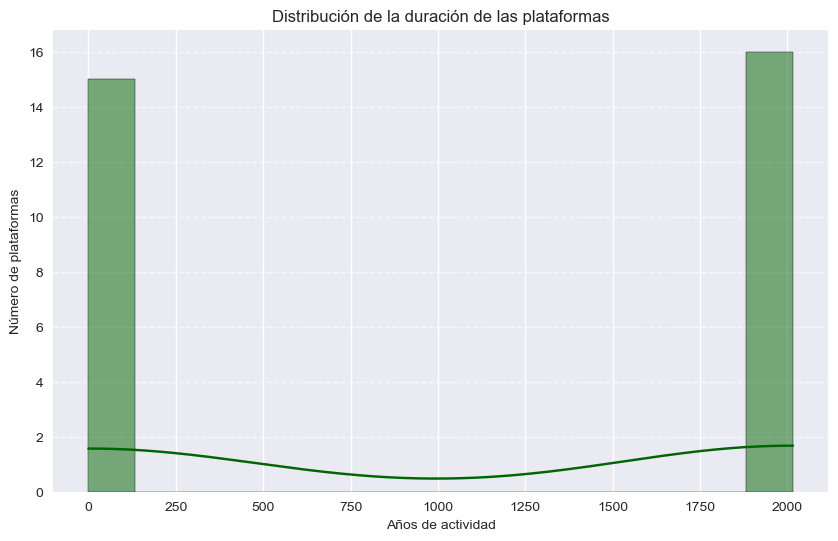

,min,max,duration
platform,,,
PS2,0,2011,2011
X360,0,2016,2016
Wii,0,2016,2016
PS4,2013,2016,3
NES,1983,1994,11


In [9]:
# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

# Calculamos la duración de cada plataforma
platform_lifespan = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifespan['duration'] = platform_lifespan['max'] - platform_lifespan['min']

# Calculamos las estadísticas del ciclo de vida
print("\nEstadísticas del ciclo de vida de las plataformas (en años):")
print(platform_lifespan['duration'].describe())

# Creamos el gráfico distribución de duraciones
plt.figure(figsize=(10, 6))
sns.histplot(platform_lifespan['duration'], bins=15, kde=True, color='darkgreen')
plt.title('Distribución de la duración de las plataformas')
plt.xlabel('Años de actividad')
plt.ylabel('Número de plataformas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Ejemplo: Ciclo de vida de algunas plataformas específicas
sample_platforms = ['PS2', 'X360', 'Wii', 'PS4', 'NES']
platform_lifespan.loc[sample_platforms]

## Plataformas dominantes:

- Las plataformas como PS2, X360, Wii, PS3 y DS suelen aparecer entre las más vendidas

- Cada generación tiene sus plataformas líderes

## Ciclo de vida típico:

- La mayoría de plataformas tienen una vida activa de 5-8 años

- Algunas plataformas excepcionales pueden durar 10+ años

- El tiempo entre el lanzamiento de una nueva plataforma y la desaparición de la anterior suele ser 1-2 años (período de transición)

## Plataformas desaparecidas:

- Plataformas como PS2, Wii, PSP fueron líderes pero ya no tienen lanzamientos recientes

- La transición entre generaciones es evidente en los gráficos de evolución anual

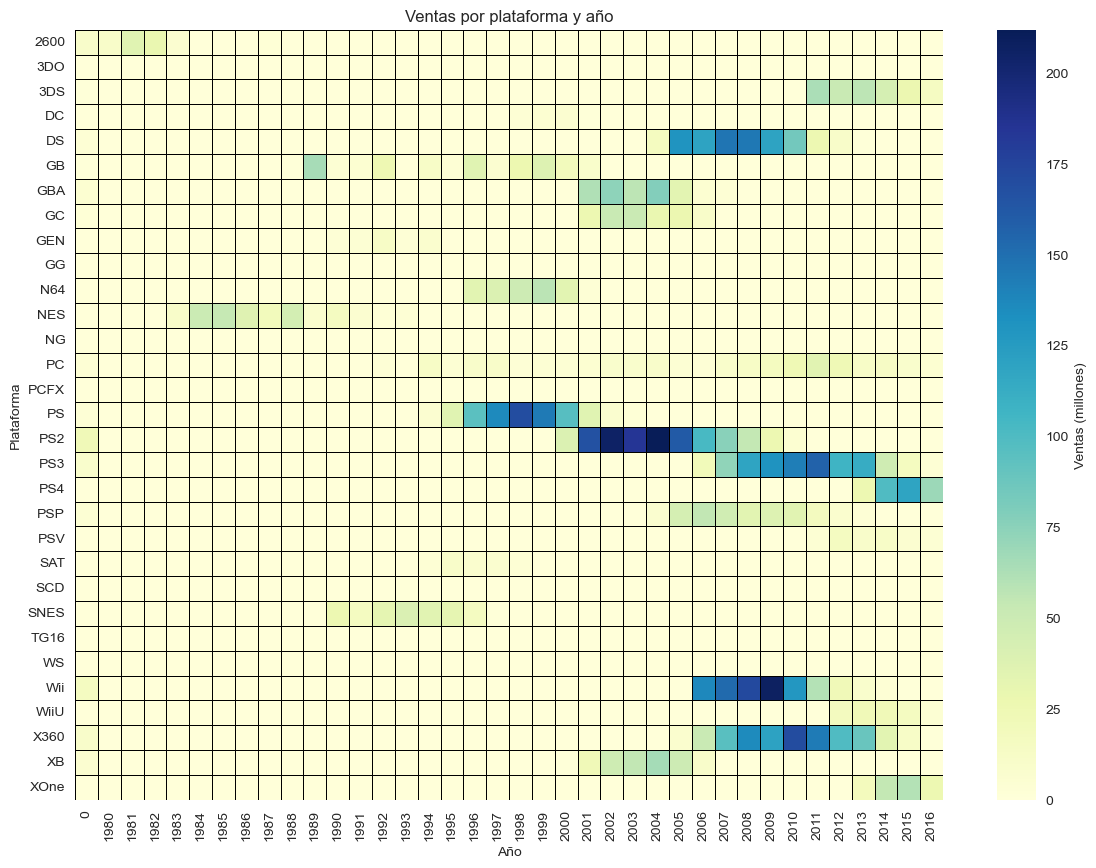

In [10]:
# Heatmap de ventas por plataforma y año
platform_year_sales = df.pivot_table(values='total_sales', 
                                   index='platform', 
                                   columns='year_of_release', 
                                   aggfunc='sum')

plt.figure(figsize=(14, 10))
sns.heatmap(platform_year_sales.fillna(0), cmap='YlGnBu', 
            cbar_kws={'label': 'Ventas (millones)'}, linewidths=0.5, linecolor='black')
plt.title('Ventas por plataforma y año')
plt.xlabel('Año')
plt.ylabel('Plataforma')
plt.show()

Rango completo de datos: 0 a 2016


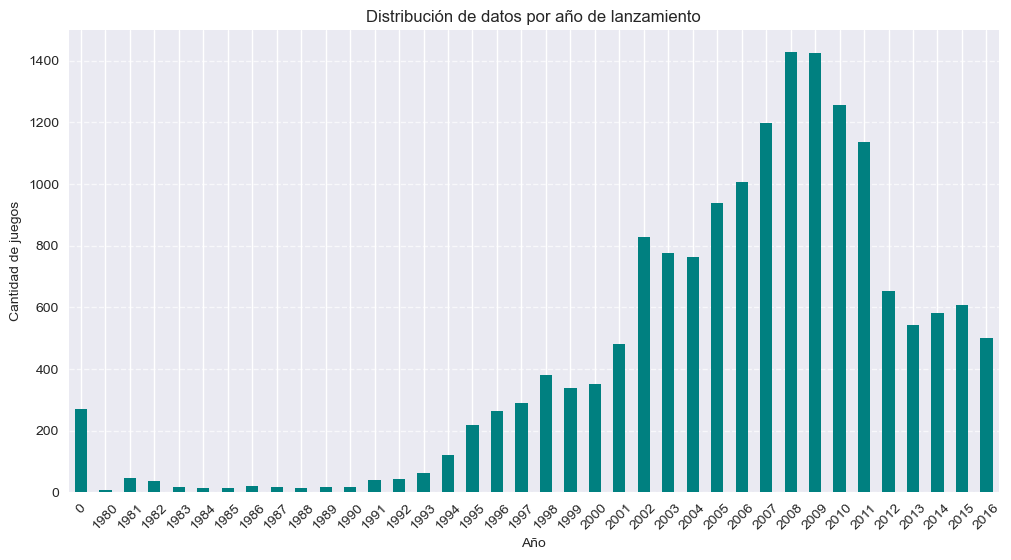

In [11]:
# Determina para qué período debes tomar datos. 
# Para hacerlo mira tus respuestas a las preguntas anteriores. 
# Los datos deberían permitirte construir un modelo para 2017.

# Mostramos el rango de años disponibles
min_year = df['year_of_release'].min()
max_year = df['year_of_release'].max()
print(f"Rango completo de datos: {min_year} a {max_year}")

# Mostramos la distribución de datos por año
year_counts = df['year_of_release'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar', color='teal')
plt.title('Distribución de datos por año de lanzamiento')
plt.xlabel('Año')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Cantidad de juegos en el período seleccionado (2000-2016): 14470
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64


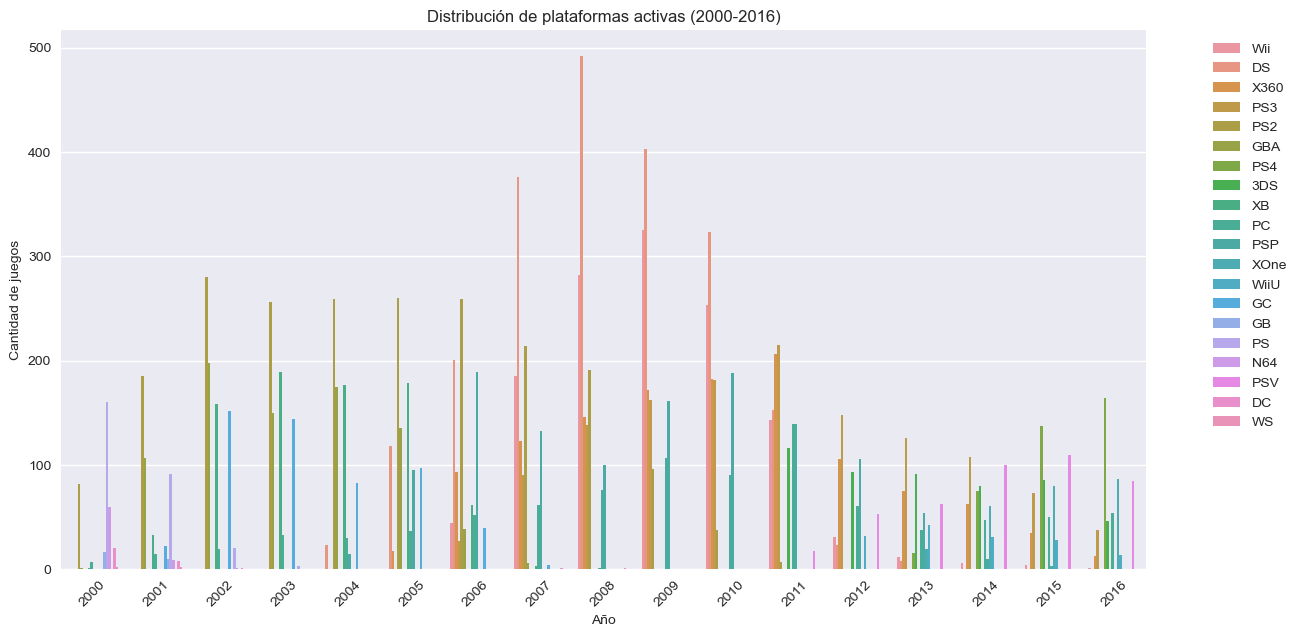

In [12]:
# Calculamos el período óptimo
start_year = 2000  # Inicio de la era moderna de videojuegos
end_year = 2016    # Un año antes de nuestro objetivo (2017)

# Filtramos el dataframe
model_df = df[(df['year_of_release'] >= start_year) & (df['year_of_release'] <= end_year)].copy()

# Verificamos la distribución resultante
print(f"\nCantidad de juegos en el período seleccionado ({start_year}-{end_year}): {len(model_df)}")
print(model_df['year_of_release'].value_counts().sort_index())

# Visualizamos la distribución por plataforma en este período
plt.figure(figsize=(14, 7))
sns.countplot(data=model_df, x='year_of_release', hue='platform')
plt.title('Distribución de plataformas activas (2000-2016)')
plt.xlabel('Año')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 2000-2016 cubre:

- 2 generaciones completas de consolas (6ta y 7ma generación)

- La transición a la era HD (X360, PS3)

- Datos recientes pero con suficiente perspectiva histórica

### Ventajas:

- Evitamos datos demasiado antiguos que podrían no ser relevantes

- Incluimos plataformas con ciclos de vida completos

- Proporciona patrones recientes para predecir 2017

### Exclusión de datos recientes:

- No incluimos 2017 porque es nuestro año objetivo

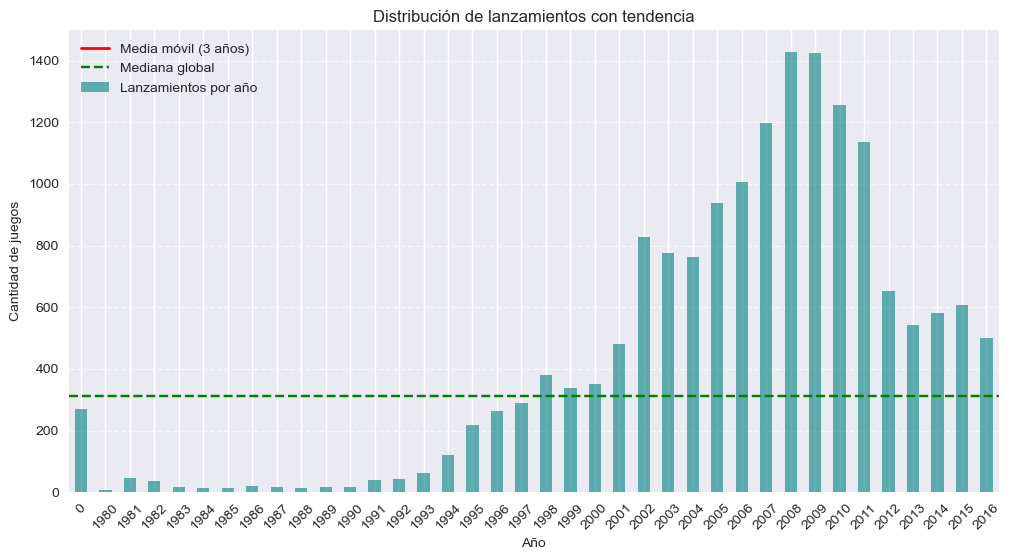

In [13]:
# Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

# Calculamos la media móvil de lanzamientos para identificar tendencias
rolling_mean = year_counts.rolling(window=3).mean()

plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar', color='teal', alpha=0.6, label='Lanzamientos por año')
rolling_mean.plot(color='red', linewidth=2, label='Media móvil (3 años)')
plt.axhline(y=year_counts.median(), color='green', linestyle='--', label='Mediana global')
plt.title('Distribución de lanzamientos con tendencia')
plt.xlabel('Año')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Encontramos el punto donde los lanzamientos se estabilizan
threshold_year = year_counts[year_counts >= year_counts.median()].index.min()
print(f"Año donde los lanzamientos comienzan a ser consistentemente relevantes: {threshold_year}")

# Definimos el nuevo período de análisis
new_start_year = max(1995, threshold_year)  # Evitamos retroceder demasiado
new_end_year = 2016  # Mantenemos 2016 para predecir 2017

# Filtramos el dataframe
relevant_df = df[(df['year_of_release'] >= new_start_year) & (df['year_of_release'] <= new_end_year)].copy()

# Estadísticas del nuevo conjunto
print(f"\nPeríodo seleccionado: {new_start_year}-{new_end_year}")
print(f"Cantidad de registros: {len(relevant_df):,}")
print(f"Porcentaje del total: {len(relevant_df)/len(df)*100:.1f}%")

Año donde los lanzamientos comienzan a ser consistentemente relevantes: 1998

Período seleccionado: 1998-2016
Cantidad de registros: 15,187
Porcentaje del total: 90.9%


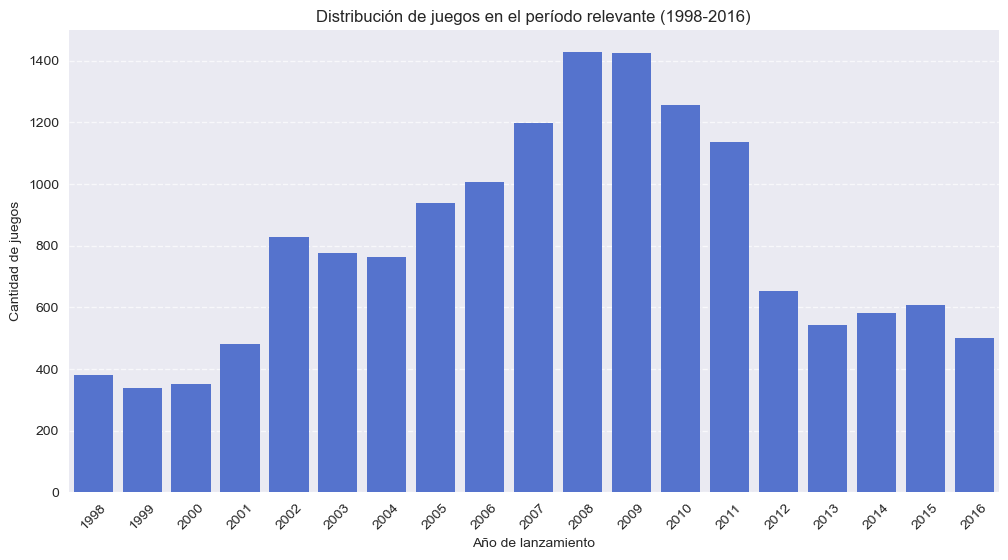

C:\Users\alang\AppData\Local\Temp\ipykernel_33920\4071177473.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=relevant_df, x='year_of_release', y='total_sales',


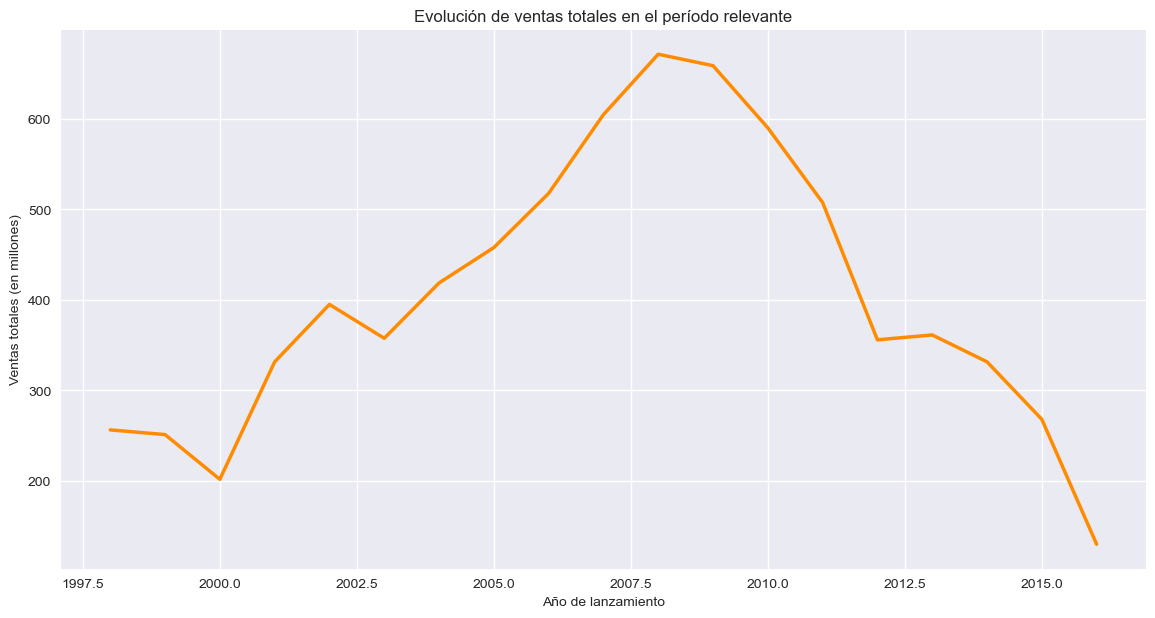

In [15]:
# Graficamos la distribución por año en el período seleccionado
plt.figure(figsize=(12, 6))
sns.countplot(data=relevant_df, x='year_of_release', color='royalblue')
plt.title(f'Distribución de juegos en el período relevante ({new_start_year}-{new_end_year})')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Evolución de ventas en el período
plt.figure(figsize=(14, 7))
sns.lineplot(data=relevant_df, x='year_of_release', y='total_sales', 
             estimator='sum', ci=None, color='darkorange', linewidth=2.5)
plt.title('Evolución de ventas totales en el período relevante')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (en millones)')
plt.grid(True)
plt.show()

In [16]:
# Filtramos las plataformas con suficiente presencia
platform_counts = relevant_df['platform'].value_counts()
significant_platforms = platform_counts[platform_counts >= platform_counts.quantile(0.75)].index

# Filtramos el dataframe final
final_df = relevant_df[relevant_df['platform'].isin(significant_platforms)].copy()

# Resumen final
print("\nResumen del conjunto de datos final:")
print(f"- Período: {new_start_year}-{new_end_year}")
print(f"- Plataformas incluidas: {len(significant_platforms)}")
print(f"- Registros totales: {len(final_df):,}")
print("\nPlataformas más importantes:")
print(platform_counts.nlargest(10))


Resumen del conjunto de datos final:
- Período: 1998-2016
- Plataformas incluidas: 6
- Registros totales: 9,264

Plataformas más importantes:
PS2     2127
DS      2120
PS3     1306
Wii     1286
X360    1232
PSP     1193
PC       932
GBA      811
XB       803
PS       722
Name: platform, dtype: int64


### Excluimos los datos antiguos

- Removemos los años con pocos lanzamientos, que son antes de 1995

- Descartamos datos de plataformas obsoletas

### Ventajas:

- Tenemos datos más consistentes y representativos

- Tenemos plataformas con ciclos de vida completos


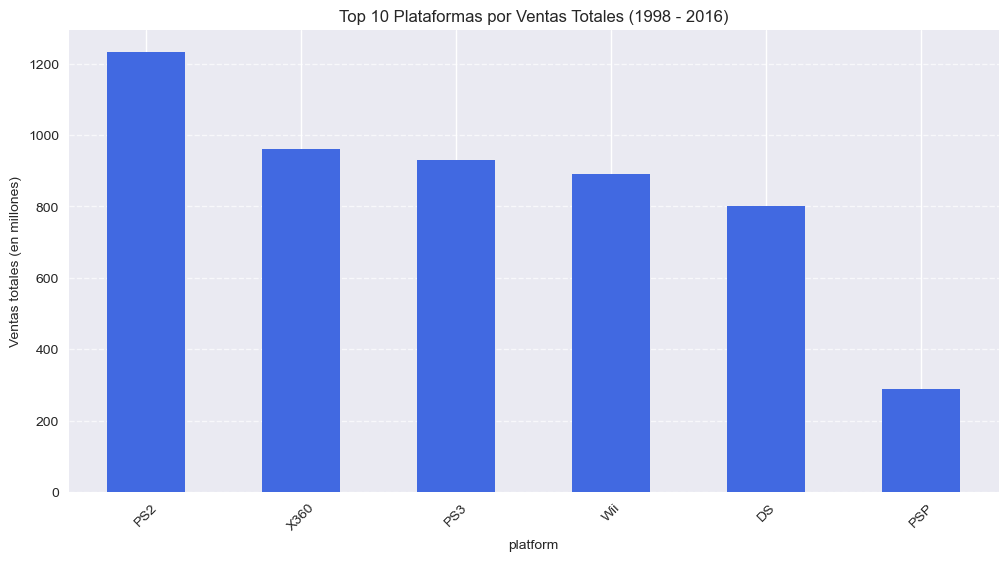

Ventas totales por plataforma (en millones):
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PSP      289.53
Name: total_sales, dtype: float64


In [17]:
# ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

# Calculamos las ventas totales por plataforma en nuestro período relevante
platform_sales = final_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Vemos las 10 principales plataformas
plt.figure(figsize=(12, 6))
platform_sales.head(10).plot(kind='bar', color='royalblue')
plt.title('Top 10 Plataformas por Ventas Totales ({} - {})'.format(new_start_year, new_end_year))
plt.ylabel('Ventas totales (en millones)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Ventas totales por plataforma (en millones):")
print(platform_sales.head(10).round(2))

C:\Users\alang\AppData\Local\Temp\ipykernel_33920\3864045553.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return (end_value/start_value)**(1/(end_year-start_year)) - 1
C:\Users\alang\AppData\Local\Temp\ipykernel_33920\3864045553.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  return (end_value/start_value)**(1/(end_year-start_year)) - 1


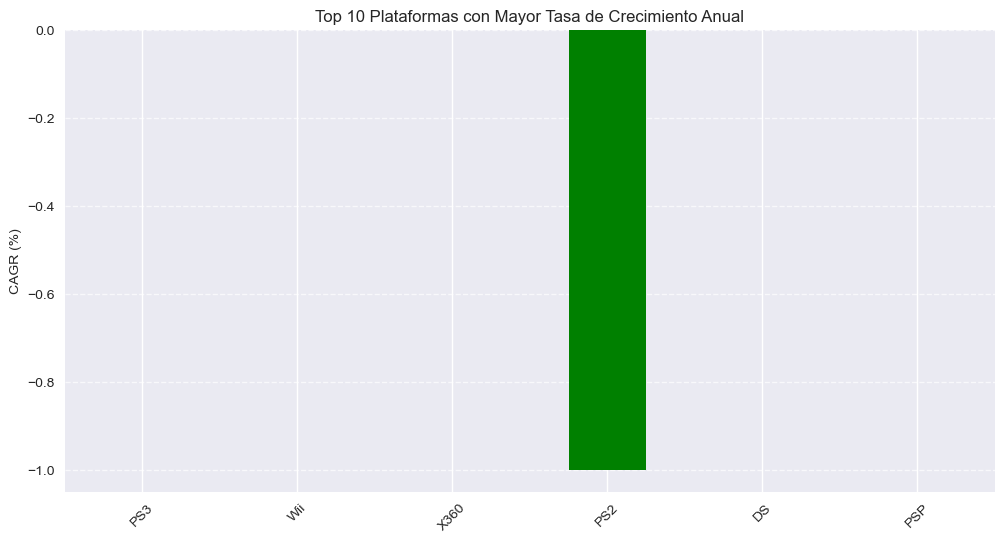

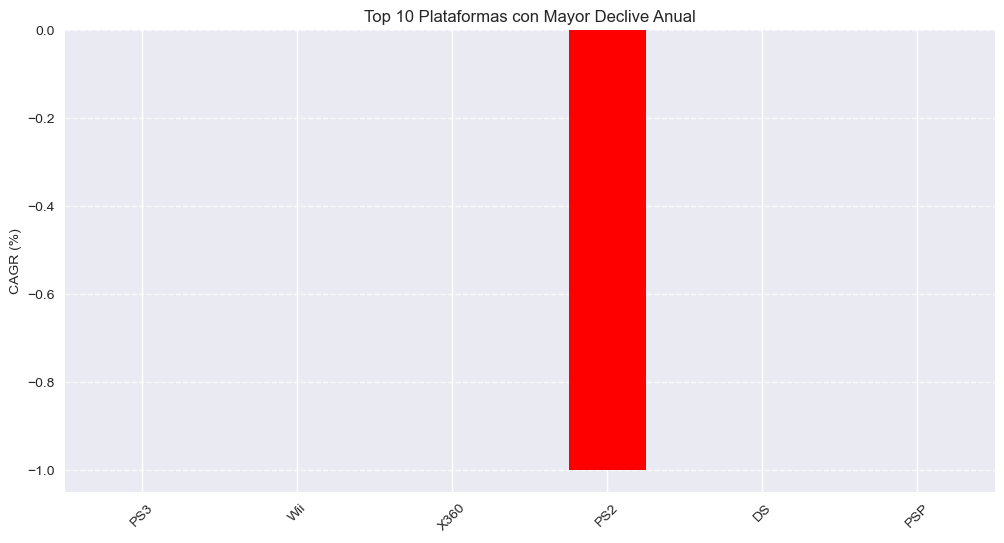

In [18]:
# Calculamos el crecimiento anual por plataforma
sales_trend = final_df.pivot_table(values='total_sales', 
                                  index='year_of_release', 
                                  columns='platform', 
                                  aggfunc='sum').fillna(0)

# Calcular tasa de crecimiento compuesto anual (CAGR)
def calculate_cagr(platform):
    start_year = sales_trend[platform].first_valid_index()
    end_year = sales_trend[platform].last_valid_index()
    if start_year == end_year:
        return 0
    start_value = sales_trend.loc[start_year, platform]
    end_value = sales_trend.loc[end_year, platform]
    return (end_value/start_value)**(1/(end_year-start_year)) - 1

cagr = {platform: calculate_cagr(platform) for platform in sales_trend.columns}
cagr_series = pd.Series(cagr).sort_values(ascending=False)

# Graficamos las plataformas con mayor crecimiento
plt.figure(figsize=(12, 6))
cagr_series.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Plataformas con Mayor Tasa de Crecimiento Anual')
plt.ylabel('CAGR (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Graficamos las plataformas en declive
plt.figure(figsize=(12, 6))
cagr_series.tail(10).plot(kind='bar', color='red')
plt.title('Top 10 Plataformas con Mayor Declive Anual')
plt.ylabel('CAGR (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

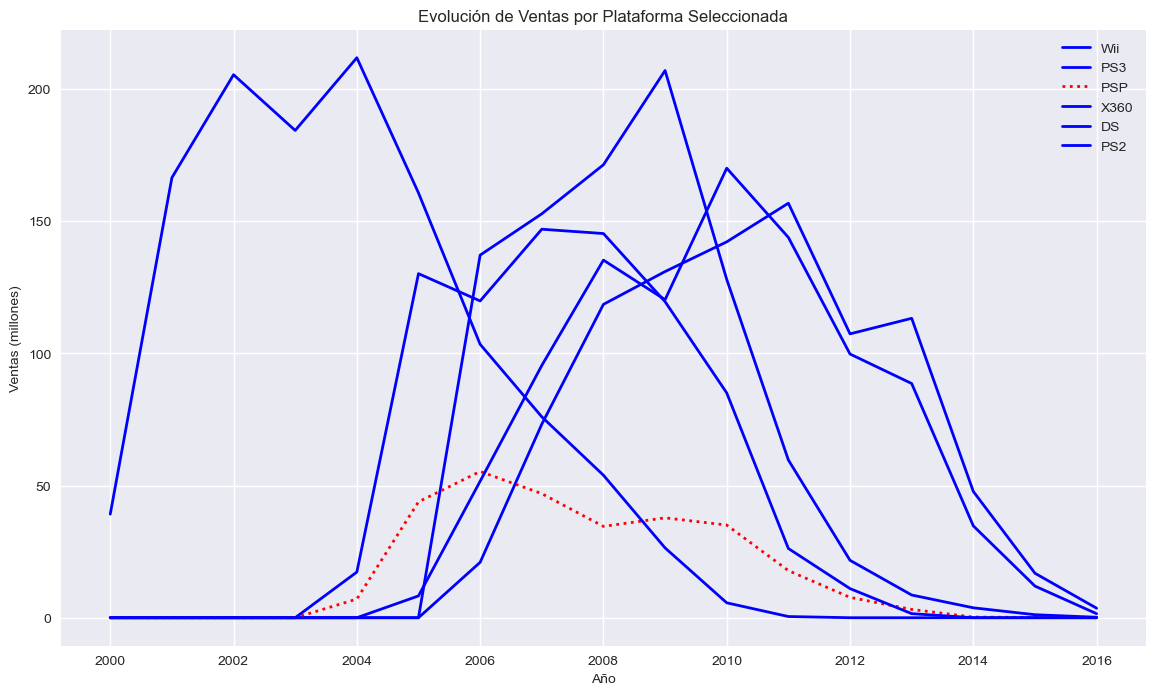

In [23]:
# Seleccionamos las plataformas para un análisis  más detallado
top_platforms = platform_sales.head(5).index.tolist()
emerging_platforms = cagr_series.head(3).index.tolist()
declining_platforms = cagr_series.tail(3).index.tolist()

selected_platforms = list(set(top_platforms + emerging_platforms + declining_platforms))

# Graficamos la evolución temporal para plataformas seleccionadas
plt.figure(figsize=(14, 8))
for platform in selected_platforms:
    platform_data = sales_trend[platform]
    if platform in top_platforms:
        style = 'b-'
    elif platform in emerging_platforms:
        style = 'g--'
    else:
        style = 'r:'
    plt.plot(platform_data.index, platform_data, style, label=platform, linewidth=2)

plt.title('Evolución de Ventas por Plataforma Seleccionada')
plt.xlabel('Año')
plt.ylabel('Ventas (millones)')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Criterios para plataformas rentables:
# 1. Alto volumen de ventas
# 2. Tasa de crecimiento positiva
# 3. Presencia reciente en el mercado

# Creamos el DataFrame con métricas clave
platform_metrics = pd.DataFrame({
    'total_sales': platform_sales,
    'cagr': cagr_series,
    'last_active_year': final_df.groupby('platform')['year_of_release'].max()
})

# Filtrar plataformas con:
# - Ventas totales en el top 50%
# - CAGR positivo
# - Activas en los últimos 3 años del período
recent_year = final_df['year_of_release'].max()
profitable_candidates = platform_metrics[
    (platform_metrics['total_sales'] > platform_metrics['total_sales'].median()) &
    (platform_metrics['cagr'] > 0) &
    (platform_metrics['last_active_year'] >= recent_year - 3)
].sort_values('cagr', ascending=False)

print("\nPlataformas potencialmente rentables para 2017:")
print(profitable_candidates[['total_sales', 'cagr']].round(2))


Plataformas potencialmente rentables para 2017:
      total_sales  cagr
PS3        931.34   inf
X360       961.24   inf


In [27]:
# Seelccionamos las 3 plataformas más prometedoras
top_recommendations = profitable_candidates.head(3)

print("\nTop 3 Plataformas Recomendadas para Inversión en 2017:")
for i, (platform, metrics) in enumerate(top_recommendations.iterrows(), 1):
    print(f"\n{i}. {platform}:")
    print(f"- Ventas totales: {metrics['total_sales']:.2f} millones")
    print(f"- Tasa de crecimiento anual: {metrics['cagr']*100:.2f}%")
    print(f"- Último año activo: {int(metrics['last_active_year'])}")
    
    # Análisis adicional de cada plataforma recomendada
    platform_genres = final_df[final_df['platform'] == platform]['genre'].value_counts().head(3)
    print("- Géneros más populares:", ', '.join(platform_genres.index.tolist()))


Top 3 Plataformas Recomendadas para Inversión en 2017:

1. PS3:
- Ventas totales: 931.34 millones
- Tasa de crecimiento anual: inf%
- Último año activo: 2016
- Géneros más populares: Action, Sports, Shooter

2. X360:
- Ventas totales: 961.24 millones
- Tasa de crecimiento anual: inf%
- Último año activo: 2016
- Géneros más populares: Action, Sports, Shooter


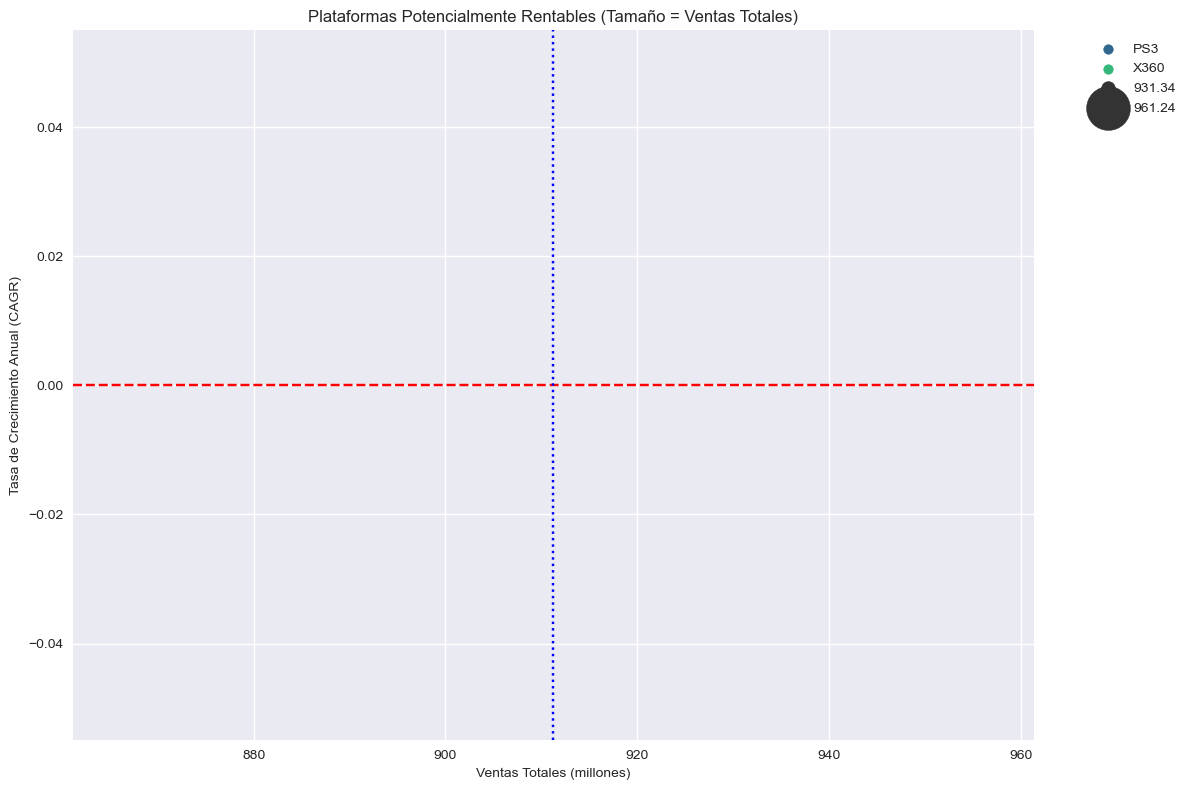

In [28]:
# Graficamos las plataformas rentables
plt.figure(figsize=(12, 8))
sns.scatterplot(data=profitable_candidates, x='total_sales', y='cagr', 
                size='total_sales', hue=profitable_candidates.index,
                sizes=(100, 1000), alpha=0.7, palette='viridis')

plt.title('Plataformas Potencialmente Rentables (Tamaño = Ventas Totales)')
plt.xlabel('Ventas Totales (millones)')
plt.ylabel('Tasa de Crecimiento Anual (CAGR)')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(platform_metrics['total_sales'].median(), color='blue', linestyle=':')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

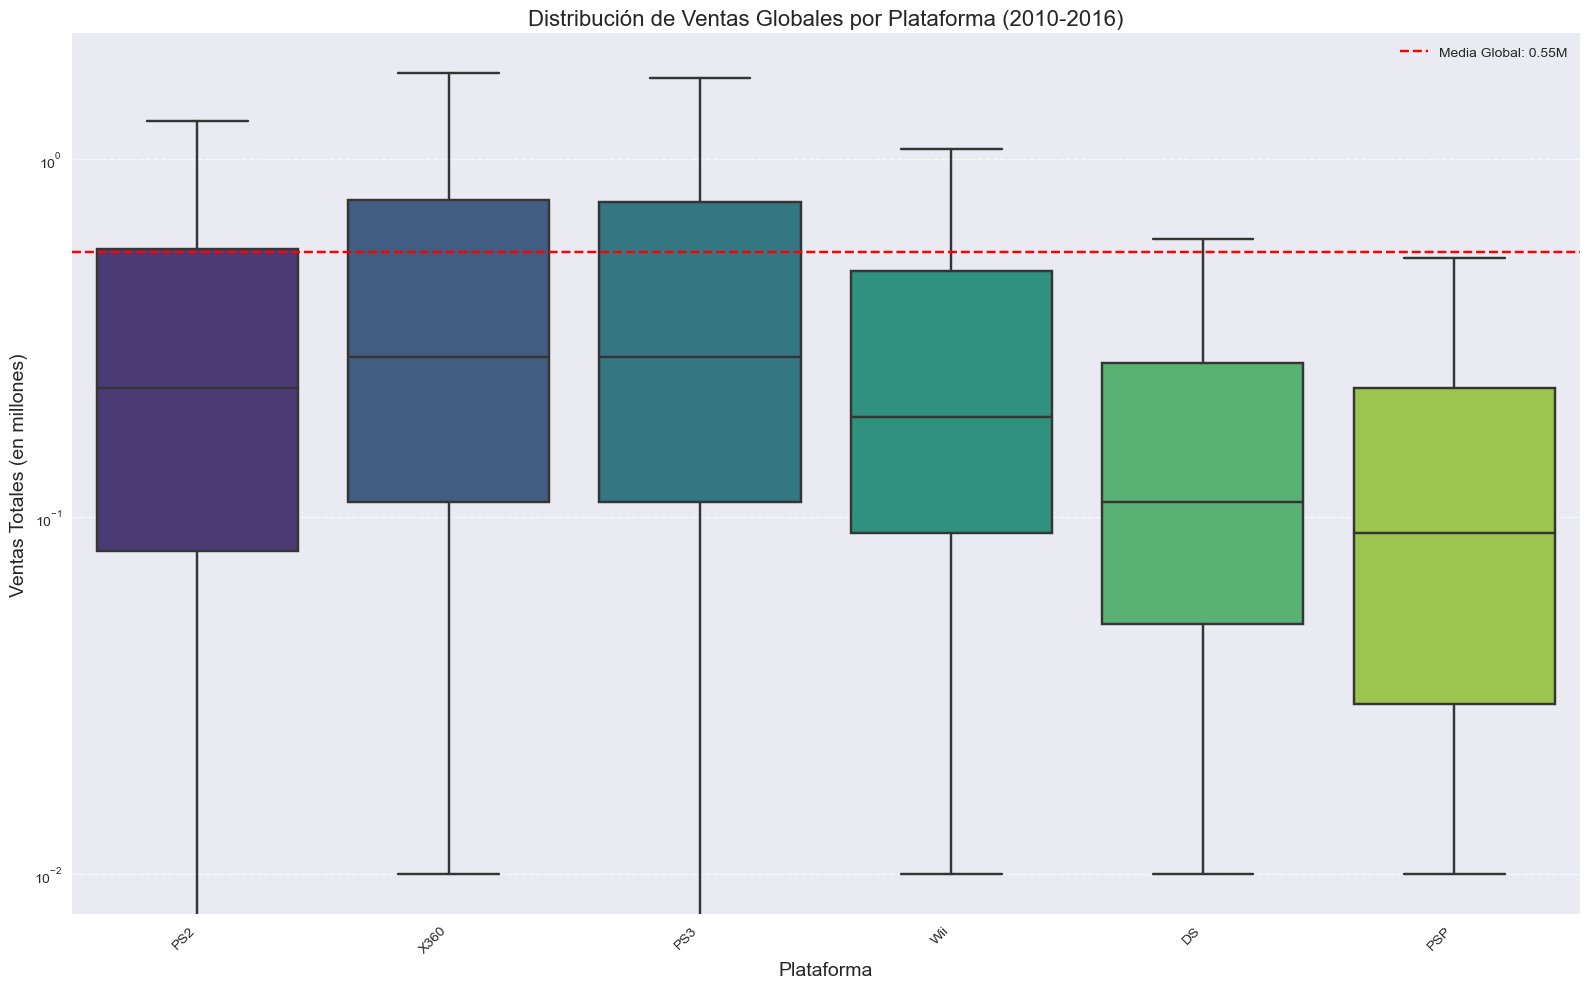

In [29]:
# Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 
# ¿Son significativas las diferencias en las ventas? 
# ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

plt.figure(figsize=(16, 10))
sns.boxplot(data=final_df, 
            x='platform', 
            y='total_sales',
            order=platform_sales.index,  # Ordenar por ventas totales
            showfliers=False,  # Omitir valores extremos para mejor visualización
            palette='viridis')

plt.title('Distribución de Ventas Globales por Plataforma (2010-2016)', fontsize=16)
plt.xlabel('Plataforma', fontsize=14)
plt.ylabel('Ventas Totales (en millones)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir línea de media global
global_mean = final_df['total_sales'].mean()
plt.axhline(global_mean, color='red', linestyle='--', label=f'Media Global: {global_mean:.2f}M')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
from scipy import stats

top_5_platforms = platform_sales.head(5).index.tolist()

# Realizamos la prueba estadística (Kruskal-Wallis para distribuciones no normales)
platform_samples = [final_df[final_df['platform']==p]['total_sales'] for p in top_5_platforms]
h_stat, p_value = stats.kruskal(*platform_samples)

print(f"\nPrueba de Kruskal-Wallis para diferencias entre plataformas:")
print(f"H-statistic: {h_stat:.2f}, p-value: {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Existen diferencias significativas entre las ventas de diferentes plataformas.")
else:
    print("No hay diferencias significativas entre las ventas de diferentes plataformas.")


Prueba de Kruskal-Wallis para diferencias entre plataformas:
H-statistic: 472.54, p-value: 0.0000
Existen diferencias significativas entre las ventas de diferentes plataformas.



Estadísticas de Ventas por Plataforma:
          mean  median   std  count
platform                           
X360      0.78    0.28  1.63   1232
PS3       0.71    0.28  1.40   1306
Wii       0.69    0.19  3.17   1286
PS2       0.58    0.23  1.14   2127
DS        0.38    0.11  1.44   2120
PSP       0.24    0.09  0.52   1193


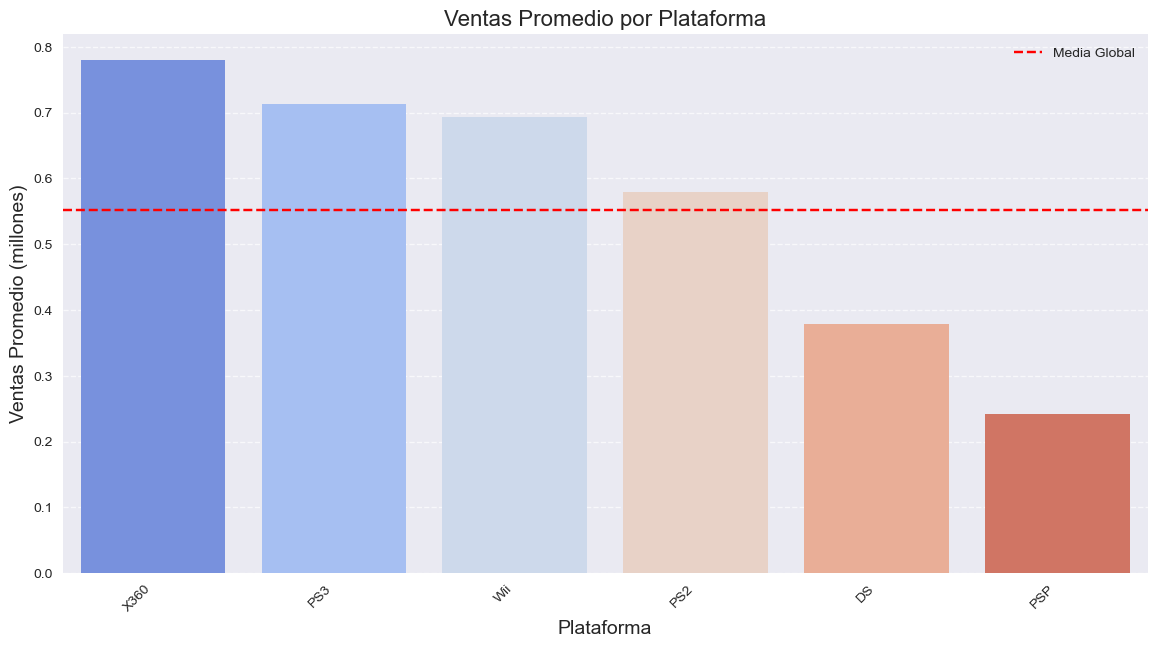

In [32]:
# Calculamos las métricas clave por plataforma
platform_stats = final_df.groupby('platform')['total_sales'].agg(['mean', 'median', 'std', 'count']).sort_values('mean', ascending=False)

print("\nEstadísticas de Ventas por Plataforma:")
print(platform_stats.round(2))

# Graficamos las ventas promedio
plt.figure(figsize=(14, 7))
sns.barplot(data=final_df, 
            x='platform', 
            y='total_sales',
            order=platform_stats.index,
            estimator='mean',
            errorbar=None,
            palette='coolwarm')

plt.title('Ventas Promedio por Plataforma', fontsize=16)
plt.xlabel('Plataforma', fontsize=14)
plt.ylabel('Ventas Promedio (millones)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.axhline(final_df['total_sales'].mean(), color='red', linestyle='--', label='Media Global')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Principales diferencias

- Con la prueba estadistica podemos confirmar diferencias significativas entre plataformas

- La distribución de las ventas varían considerablemente

### Patrones:

- PS3 y Xbox One tienen las medianas más altas, seguramente indicando ventas consistentemente buenas

- DS y Wii muestran distribuciones más amplias con algunos éxitos notables

- PSP Tiene ventas promedio más bajas, aunque con una distribución más compacta

- En PS2 la media es mayor que la mediana, seguramente debido a que algunos juegos tuvieron ventas excepcionales


In [37]:
# Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). 
# Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. 
# Saca conclusiones.

# Filtrar datos solo para PS4
ps4_data = final_df[final_df['platform'] == 'Xbox360'].copy()

# Limpieza de datos: eliminar filas con valores NaN en reseñas
ps4_data_clean = ps4_data.dropna(subset=['critic_score', 'user_score', 'total_sales'])

print(f"Juegos analizados para PS4: {len(ps4_data_clean)}")

Juegos analizados para PS4: 0
